
## Import DFN data

In [2]:
import hashlib
#md5_hash = hashlib.md5()

# MFCentrepoints_final.txt
root = "C:\\Users\\simold\\Documents\\git\\geoseer\\data\\DFNGEN\\"
fn = "MFCentrepoints_final.txt"


file = root+fn

with open(file) as f:
    #f_data = f.read()
    #file_hash = hashlib.md5(f_data.encode())
    f_data = f.readlines()

#print(file_hash.hexdigest())

hdrs = ['FracNo',
        'Set',
        'IPlusHalfLength',
        'IMinusHalfLength',
        'Number of points',
        'Dip',
        'IPlusTipType',
        'IMinusTipType',
        'IPlusTerminatingFracture',
        'IMinusTerminatingFracture',
        'Nucleation time (ma)'
        ]

start_rec = "Start Points"
end_rec = "End Points"


print(f_data)

['FracNo\tSet\tIPlusHalfLength\tIMinusHalfLength\tNumber of points\tDip\tIPlusTipType\tIMinusTipType\tIPlusTerminatingFracture\tIMinusTerminatingFracture\tNucleation time (ma)\t\n', '2\tHMin\t15.4504880753581\t4.54951192464191\t4\t1.01722196789785\tOutOfBounds\tOutOfBounds\t0\t0\t0.143460104322922\t\n', 'Start Points\n', '-4.05685508126982E-18\t11.6253526050715\t2003\t\n', '4.54951192464191\t11.6253526050715\t2003\t\n', '10\t11.6253526050715\t2003\t\n', '20\t11.6253526050715\t2003\t\n', 'End Points\n', '3\tHMin\t1.00195544818507\t18.9980445518149\t4\t1.01722196789785\tOutOfBounds\tOutOfBounds\t0\t0\t0.143623295774694\t\n', 'Start Points\n', '4.22819430501985E-18\t3.55732942165682\t2003\t\n', '10\t3.55732942165682\t2003\t\n', '18.9980445518149\t3.55732942165683\t2003\t\n', '20\t3.55732942165683\t2003\t\n', 'End Points\n', '4\tHMin\t5.53395193327868\t14.4660480667213\t4\t1.01722196789785\tOutOfBounds\tOutOfBounds\t0\t0\t0.143668673080659\t\n', 'Start Points\n', '-1.87824992665333E-17\t18

In [3]:
print(len(f_data))

fxls = []

for line in f_data:
    line = line.strip().split('\t')
    fxls.append(line)



53


In [4]:
hdr = fxls[0]

fx_db = []

print(hdr)

['FracNo', 'Set', 'IPlusHalfLength', 'IMinusHalfLength', 'Number of points', 'Dip', 'IPlusTipType', 'IMinusTipType', 'IPlusTerminatingFracture', 'IMinusTerminatingFracture', 'Nucleation time (ma)']


Bring in individual fracture records and develop a database.

In [5]:
#import hashlib
import numpy as np


def read_datafile(file):
    """
    Open and read data from a tab-deliminated ascii file, strip and split on line endings and tabs.
    Return list of lines.
    :param file:
    :return:
    """
    with open(file) as f:
    #f_data = f.read()
        #file_hash = hashlib.md5(f.encode())
        file_data = f.readlines()

    # import file lines
    read_data = []

    for line in file_data:
        line = line.strip().split('\t')
        read_data.append(line)
    return read_data

def import_macrofractures(file, fx_rep='centreline'):
    """
    Function to import fracture data from output from the DFN Generator in either centreline or polygon format
    :return: database of fractures
    """
    read_data = read_datafile(file)

    # build dataset
    hdr = read_data[0]
    len_hdr = len(hdr)

    fracture_db = dict()
    fracture_counter = 0

    for line in read_data[1:]:
        if len(line) == len_hdr:
            fracture_db[fracture_counter] = dict()
            for hdr_col in range(len(hdr)):
                fracture_db[fracture_counter][hdr[hdr_col]] = line[hdr_col]
            fracture_db[fracture_counter]['Coords'] = []
            fracture_counter += 1
        elif line == ['Start Points'] or line == ['End Points'] :
            pass
        else:
            fracture_db[fracture_counter-1]['Coords'].append(line)
            #fracture_db[fracture_counter]['Coords'] = line

    # TODO: Manage data types
    for key in fracture_db.keys():
        fracture_db[key]['FracNo'] = int(fracture_db[key]['FracNo'])
        fracture_db[key]['IPlusHalfLength'] = np.float64(fracture_db[key]['IPlusHalfLength'])
        fracture_db[key]['IMinusHalfLength'] = np.float64(fracture_db[key]['IMinusHalfLength'])
        fracture_db[key]['Number of points'] = int(fracture_db[key]['Number of points'])
        fracture_db[key]['Dip'] = np.float64(fracture_db[key]['Dip'])
        fracture_db[key]['IPlusTerminatingFracture'] = int(fracture_db[key]['IPlusTerminatingFracture'])
        fracture_db[key]['IMinusTerminatingFracture'] = int(fracture_db[key]['IMinusTerminatingFracture'])
        fracture_db[key]['Nucleation time (ma)'] = np.float64(fracture_db[key]['Nucleation time (ma)'])
        fracture_db[key]['Coords'] = np.asarray(fracture_db[key]['Coords'], dtype=np.float64)

    return fracture_db

fracture_db = import_macrofractures(file, fx_rep='centreline')

fracture_db

{0: {'FracNo': 2,
  'Set': 'HMin',
  'IPlusHalfLength': 15.4504880753581,
  'IMinusHalfLength': 4.54951192464191,
  'Number of points': 4,
  'Dip': 1.01722196789785,
  'IPlusTipType': 'OutOfBounds',
  'IMinusTipType': 'OutOfBounds',
  'IPlusTerminatingFracture': 0,
  'IMinusTerminatingFracture': 0,
  'Nucleation time (ma)': 0.143460104322922,
  'Coords': array([[-4.05685508e-18,  1.16253526e+01,  2.00300000e+03],
         [ 4.54951192e+00,  1.16253526e+01,  2.00300000e+03],
         [ 1.00000000e+01,  1.16253526e+01,  2.00300000e+03],
         [ 2.00000000e+01,  1.16253526e+01,  2.00300000e+03]])},
 1: {'FracNo': 3,
  'Set': 'HMin',
  'IPlusHalfLength': 1.00195544818507,
  'IMinusHalfLength': 18.9980445518149,
  'Number of points': 4,
  'Dip': 1.01722196789785,
  'IPlusTipType': 'OutOfBounds',
  'IMinusTipType': 'OutOfBounds',
  'IPlusTerminatingFracture': 0,
  'IMinusTerminatingFracture': 0,
  'Nucleation time (ma)': 0.143623295774694,
  'Coords': array([[4.22819431e-18, 3.55732942e+0

Data now extracted from file, next step to generate plots of the fracture lines.

In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString


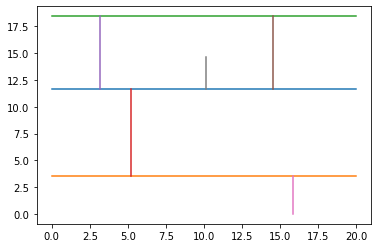

In [7]:
for key in fracture_db.keys():
    x = fracture_db[key]['Coords'][:,0]
    y = fracture_db[key]['Coords'][:,1]
    plt.plot(x, y)

plt.show()

In [8]:
for key in fracture_db.keys():
    x = fracture_db[key]['Coords'][:,0]
    y = fracture_db[key]['Coords'][:,1]
    print(list(zip(x,y)))

[(-4.05685508126982e-18, 11.6253526050715), (4.54951192464191, 11.6253526050715), (10.0, 11.6253526050715), (20.0, 11.6253526050715)]
[(4.22819430501985e-18, 3.55732942165682), (10.0, 3.55732942165682), (18.9980445518149, 3.55732942165683), (20.0, 3.55732942165683)]
[(-1.87824992665333e-17, 18.4386683993222), (10.0, 18.4386683993222), (14.4660480667213, 18.4386683993222), (20.0, 18.4386683993222)]
[(5.21680651475527, 3.55732942165682), (5.21680651475527, 5.0024216831673), (5.21680651475527, 10.0), (5.21680651475527, 11.6253526050715)]
[(3.17994487154295, 11.6253526050715), (3.17994487154295, 18.0499420166248), (3.17994487154295, 18.4386683993222)]
[(14.5659772514207, 11.6253526050715), (14.5659772514207, 16.8506963489813), (14.5659772514207, 18.4386683993222)]
[(15.847308512706, 0.0), (15.847308512706, 3.50619767955793), (15.847308512706, 3.55732942165682)]
[(10.1210597577137, 11.6253526050715), (10.1210597577137, 13.898462575813), (10.1210597577137, 14.6394245115292)]


Currently location data is stored as coordinates, need to convert this to a unified list of vertices.
Afterwards, then screen vertices for those that are too close to one another.

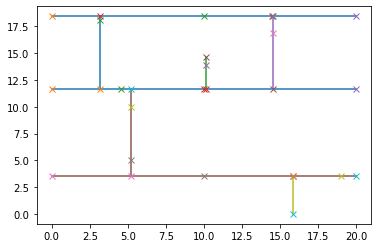

In [9]:

for key in fracture_db.keys():
    x = fracture_db[key]['Coords'][:,0]
    y = fracture_db[key]['Coords'][:,1]
    plt.plot(x, y)
    for i in range(len(x)):
        plt.plot(x[i], y[i], 'x')

plt.show()

Label vertices by type and with unique reference

In [10]:

def del_vt_labels(fracture_database):
    """
    Deletes all vertex labels in a fracture database.
    :param fracture_database:
    :return:
    """
    for key in fracture_db.keys():
        fracture_db[key]['vt_id'] = []

del_vt_labels(fracture_db)


#for key in fracture_db.keys():
#    print(fracture_db[key]['vt_labels'])
# add labels for the vertices

# label fracture network vertices

vt_i = 0
fracture_db[key]['vt_id'] = []

for key in fracture_db.keys():
    vertex_count = len(fracture_db[key]['Coords'])
    for count in range(vertex_count):
        fracture_db[key]['vt_id'].append(vt_i)
        vt_i += 1

    # testing length of ids equals length of coordinates
    print(fracture_db[key]['vt_id'], len(fracture_db[key]['vt_id'])==len(fracture_db[key]['Coords']))

[0, 1, 2, 3] True
[4, 5, 6, 7] True
[8, 9, 10, 11] True
[12, 13, 14, 15] True
[16, 17, 18] True
[19, 20, 21] True
[22, 23, 24] True
[25, 26, 27] True


In [11]:
fracture_db

{0: {'FracNo': 2,
  'Set': 'HMin',
  'IPlusHalfLength': 15.4504880753581,
  'IMinusHalfLength': 4.54951192464191,
  'Number of points': 4,
  'Dip': 1.01722196789785,
  'IPlusTipType': 'OutOfBounds',
  'IMinusTipType': 'OutOfBounds',
  'IPlusTerminatingFracture': 0,
  'IMinusTerminatingFracture': 0,
  'Nucleation time (ma)': 0.143460104322922,
  'Coords': array([[-4.05685508e-18,  1.16253526e+01,  2.00300000e+03],
         [ 4.54951192e+00,  1.16253526e+01,  2.00300000e+03],
         [ 1.00000000e+01,  1.16253526e+01,  2.00300000e+03],
         [ 2.00000000e+01,  1.16253526e+01,  2.00300000e+03]]),
  'vt_id': [0, 1, 2, 3]},
 1: {'FracNo': 3,
  'Set': 'HMin',
  'IPlusHalfLength': 1.00195544818507,
  'IMinusHalfLength': 18.9980445518149,
  'Number of points': 4,
  'Dip': 1.01722196789785,
  'IPlusTipType': 'OutOfBounds',
  'IMinusTipType': 'OutOfBounds',
  'IPlusTerminatingFracture': 0,
  'IMinusTerminatingFracture': 0,
  'Nucleation time (ma)': 0.143623295774694,
  'Coords': array([[4.22

In [12]:

class Vertex:
    """
    Class to host a single vertex that sits within a fracture network
    """
    def __init__(self, vt_id, vt_coords, fracture_membership):
        self.vt_id = vt_id
        self.name = 'vt'+str(self.vt_id)
        self.coords = vt_coords
        self.fracture_membership = fracture_membership
        self.vt_position = "centrepoints"

    def __str__(self):
        return str(self.name) + " " + str(self.coords) + " Member of: " + str(self.fracture_membership)

    def __repr__(self):
        return self.__dict__

In [13]:
vertex_list = []

for key in fracture_db.keys():
    pt_id = fracture_db[key]['vt_id']
    coords = fracture_db[key]['Coords']
    frac_number = fracture_db[key]['FracNo']
    for pt in range(len(pt_id)):
        vtx = Vertex(pt_id[pt], coords[pt], frac_number)
        print(vtx)
        vertex_list.append(vtx)

vt0 [-4.05685508e-18  1.16253526e+01  2.00300000e+03] Member of: 2
vt1 [   4.54951192   11.62535261 2003.        ] Member of: 2
vt2 [  10.           11.62535261 2003.        ] Member of: 2
vt3 [  20.           11.62535261 2003.        ] Member of: 2
vt4 [4.22819431e-18 3.55732942e+00 2.00300000e+03] Member of: 3
vt5 [  10.            3.55732942 2003.        ] Member of: 3
vt6 [  18.99804455    3.55732942 2003.        ] Member of: 3
vt7 [  20.            3.55732942 2003.        ] Member of: 3
vt8 [-1.87824993e-17  1.84386684e+01  2.00300000e+03] Member of: 4
vt9 [  10.          18.4386684 2003.       ] Member of: 4
vt10 [  14.46604807   18.4386684  2003.        ] Member of: 4
vt11 [  20.          18.4386684 2003.       ] Member of: 4
vt12 [   5.21680651    3.55732942 2003.        ] Member of: 6
vt13 [   5.21680651    5.00242168 2003.        ] Member of: 6
vt14 [   5.21680651   10.         2003.        ] Member of: 6
vt15 [   5.21680651   11.62535261 2003.        ] Member of: 6
vt16 [   

In [14]:

for i in vertex_list:
    print(i.__repr__())


{'vt_id': 0, 'name': 'vt0', 'coords': array([-4.05685508e-18,  1.16253526e+01,  2.00300000e+03]), 'fracture_membership': 2, 'vt_position': 'centrepoints'}
{'vt_id': 1, 'name': 'vt1', 'coords': array([   4.54951192,   11.62535261, 2003.        ]), 'fracture_membership': 2, 'vt_position': 'centrepoints'}
{'vt_id': 2, 'name': 'vt2', 'coords': array([  10.        ,   11.62535261, 2003.        ]), 'fracture_membership': 2, 'vt_position': 'centrepoints'}
{'vt_id': 3, 'name': 'vt3', 'coords': array([  20.        ,   11.62535261, 2003.        ]), 'fracture_membership': 2, 'vt_position': 'centrepoints'}
{'vt_id': 4, 'name': 'vt4', 'coords': array([4.22819431e-18, 3.55732942e+00, 2.00300000e+03]), 'fracture_membership': 3, 'vt_position': 'centrepoints'}
{'vt_id': 5, 'name': 'vt5', 'coords': array([  10.        ,    3.55732942, 2003.        ]), 'fracture_membership': 3, 'vt_position': 'centrepoints'}
{'vt_id': 6, 'name': 'vt6', 'coords': array([  18.99804455,    3.55732942, 2003.        ]), 'frac

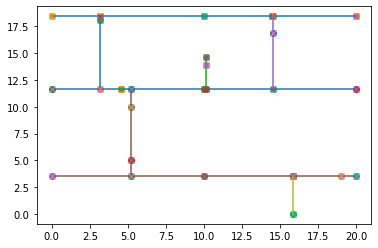

In [15]:
for i in vertex_list:
    plt.scatter(i.coords[0], i.coords[1])

for key in fracture_db.keys():
    x = fracture_db[key]['Coords'][:,0]
    y = fracture_db[key]['Coords'][:,1]
    plt.plot(x, y)
    for i in range(len(x)):
        plt.plot(x[i], y[i], 'x')

plt.show()


Basic representation of points as vertices acheived

Now need to associate the vertices with fractures and

2
3
6


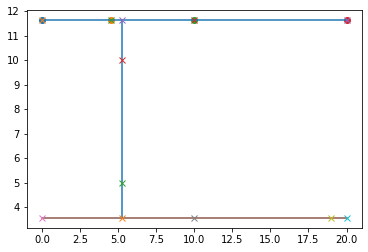

In [16]:
for i in vertex_list:
    if i.fracture_membership == (2 or 3 or 6):
        plt.scatter(i.coords[0], i.coords[1])

for key in fracture_db.keys():
    if fracture_db[key]['FracNo'] == 2 or fracture_db[key]['FracNo'] == 3 or fracture_db[key]['FracNo'] == 6:
        print(fracture_db[key]['FracNo'])
        x = fracture_db[key]['Coords'][:,0]
        y = fracture_db[key]['Coords'][:,1]
        plt.plot(x, y)
        for i in range(len(x)):
            plt.plot(x[i], y[i], 'x')

plt.show()

Reviewing individual fractures, vertices are located along the edges.

Fractures do not include the vertex of the truncated fracture.

When we insert we need to preserve a record of the relationship between fractures and also the type of connection.
This must differentiate between intersections and stress shadows (relays).


Later, will need to also check for duplicate or 'isclose' points in the grid.

In [17]:
# Add a list of fracture vertices to the individual fractures

# for each fracture compile a list of edges defined by their vertices, ordered from one end to the other

for key in fracture_db.keys():
    pt_id = fracture_db[key]['vt_id']
    coords = fracture_db[key]['Coords']
    frac_number = fracture_db[key]['FracNo']

In [18]:
frac_key_lup = dict()

for key in fracture_db.keys():
    frac_key_lup[fracture_db[key]['FracNo']] = key

print(frac_key_lup)

# identify fracture vertex that requires insertion

tip_types = {
    'OutOfBounds': 'boundary',
    'Intersection': 'truncation',
    'StressShadow': 'relay'
}

{2: 0, 3: 1, 4: 2, 6: 3, 5: 4, 7: 5, 9: 6, 8: 7}


In [20]:
# identify fracture tips and their types
for key in fracture_db.keys():
    if fracture_db[key]['IPlusTipType'] == 'OutOfBounds':
        pass
    elif fracture_db[key]['IPlusTipType'] == 'Intersection':
        link_frac_ip = fracture_db[key]['IPlusTerminatingFracture']
        link_type_ip = tip_types[fracture_db[key]['IPlusTipType']]
    elif fracture_db[key]['IPlusTipType'] == 'StressShadow':
        link_frac_ip = fracture_db[key]['IPlusTerminatingFracture']
        link_type_ip = tip_types[fracture_db[key]['IPlusTipType']]
    else:
        print('unknown fracture link type')

    if fracture_db[key]['IMinusTipType'] == 'OutOfBounds':
        pass
    elif fracture_db[key]['IMinusTipType'] == 'Intersection':
        link_frac_im = fracture_db[key]['IMinusTerminatingFracture']
        link_type_im = tip_types[fracture_db[key]['IMinusTipType']]
    elif fracture_db[key]['IMinusTipType'] == 'StressShadow':
        link_frac_im = fracture_db[key]['IMinusTerminatingFracture']
        link_type_im = tip_types[fracture_db[key]['IMinusTipType']]
    else:
        print('unknown fracture link type')

    # insert coordinates into main fractures

    # look up truncating fracture



    # if fracture_db[key]['IMinusTipType'] =


# insert vt_id from truncated fracture into another fracture

In [ ]:
fracture_db.keys()